# Project: Investigating The Movie Database (TMDB) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This movie database contains information about approximately 10,000 movies including genres, ratings, revenue, budget, and more. It contains movies which are released over 56 years between 1960 and 2015, it also has two columns for budget and revenue in terms of 2010 dollars accounting for inflation over time which will be used in any comparisons in my analysis instead of unadjusted ones.

In this investigation, I'll be looking to answer some interesting questions like, 
* how genres order of popularity changed over time?
* is higher rating means higher revenues for the movie?
* how are the cost of making a movie and total spending changed over time?

In [1]:
# importing libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To plot visuals inside the notebook
% matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#Loading Data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

> We won't need all this columns in our investigation so we are going to drop some of them in later steps.The columns we need are: popularity, genres, vote_average, release_year, budget_adj and revenue_adj.

#### Let's see more information about the data.

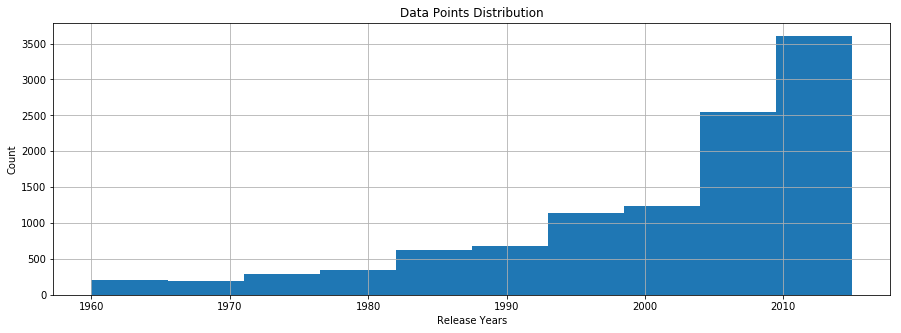

In [4]:
ax=df.release_year.hist(figsize=(15,5));
ax.set_xlabel('Release Years')
ax.set_ylabel('Count')
ax.set_title('Data Points Distribution');

> It seems that our data contains more movies in recent years than the earlier ones.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum() #exploring null values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Most columns are represented by appropriate **data types** except release year column, and there are **null values** in some columns but only one of them is in the centre of our analysis which is genres. So, we will investigate those null values and look for ways to elimenate them.

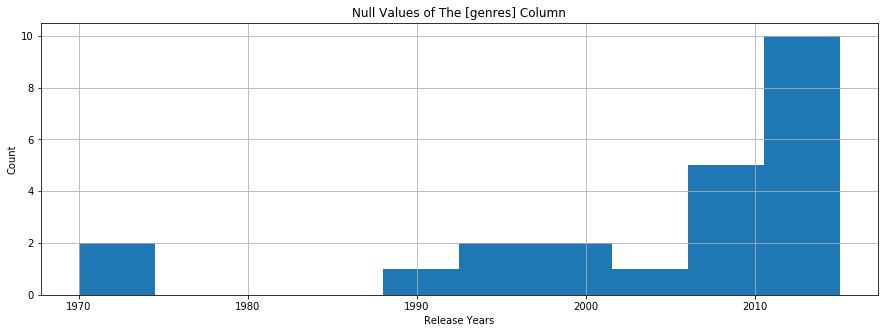

In [7]:
ax=df[df.genres.isnull()].release_year.hist(figsize=(15,5));
ax.set_xlabel('Release Years')
ax.set_ylabel('Count')
ax.set_title('Null Values of The [genres] Column');

> The distribution of null values aligns with the distribution of the data points over the years. So, **dropping** null values would be a good way to clean our data since it is a non-numerical column.

**Looking for any other missing data..**

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> There are movies with zero revenue and/or budget that can affect the results of our analysis if the are just missing data.

In [9]:
df_zeroes= df.query('revenue_adj == 0 & budget_adj == 0') #query data with zero revenue or budget
print('Count of Rows is',df_zeroes.count()[0]) #count of rows
df_zeroes.head()

Count of Rows is 4701


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0


>I looked up some of the movies with zero revenue/budget in our data and found that some of them are with high revenues like 'Frozen Fever' which made a revenue of $1 Billion. So, I'm going to assume that movies with zero budget **and** revenue are missing data and drop them. 

Duplicates:

In [10]:
sum(df.duplicated())

1

> Only one row is duplicated so it will be dropped as well.

### Data Cleaning

#### Removing Unneeded Columns

In [11]:
df.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies','release_date','vote_count'],axis=1, inplace=True)

Let's check the data now.

In [13]:
df.head()

,popularity,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


Much better!

#### Removing Duplicates

In [14]:
df.drop_duplicates(inplace=True)

#### Fixing Data Types (release_year)

In [15]:
df.release_year=df.release_year.astype(str)

#### Fixing Missing Data (genres)

In [16]:
df.dropna(inplace=True)

#### Fixing Missing Data (budget_adj and revenue_adj)

In [17]:
df_zeroes=df.query('revenue_adj == 0 & budget_adj == 0')
df.drop(df_zeroes.index,inplace=True)

In [18]:
df.shape

(6163, 6)

> We now have 6163 rows out of 10886 rows from the original dataset.

<a id='eda'></a>
## Exploratory Data Analysis



### How Genres Order of Popularity Changed Over Time?

In [19]:
df.genres.value_counts()

Drama                                             403
Comedy                                            360
Drama|Romance                                     190
Comedy|Romance                                    171
Comedy|Drama                                      154
Horror|Thriller                                   151
Comedy|Drama|Romance                              151
Horror                                            114
Drama|Thriller                                     85
Action|Thriller                                    70
Documentary                                        70
Drama|Comedy                                       60
Comedy|Family                                      56
Crime|Drama|Thriller                               53
Crime|Drama                                        45
Thriller                                           44
Action|Crime|Thriller                              43
Drama|Comedy|Romance                               41
Action                      

> Note that we left genres column with the sperators (|), but we will split it now into multiple rows in a seperate data frame so that we don't duplicate all values with it in the original data frame.

In [20]:
df_gen=pd.DataFrame(data=df.genres.str.split('|').tolist(),\
                    index=[df.release_year,df.popularity]).stack() #splitting genres into rows in a separate data frame
df_gen=df_gen.reset_index([0,1,2])
df_gen.rename(mapper={0:'genres'},axis=1,inplace=True)  #renaming genres column
df_gen.head()

,release_year,popularity,level_2,genres
0,2015,32.985763,0,Action
1,2015,32.985763,1,Adventure
2,2015,32.985763,2,Science Fiction
3,2015,32.985763,3,Thriller
4,2015,28.419936,0,Action


> Rows with multiple values in genres column are splitted into multiple rows and all the other columns' values are duplicated with it. And now we are ready to explore genres separately. But first let's see the occurances of genres in general.

In [21]:
df_gen.genres.nunique() #Count unique values in genres

20

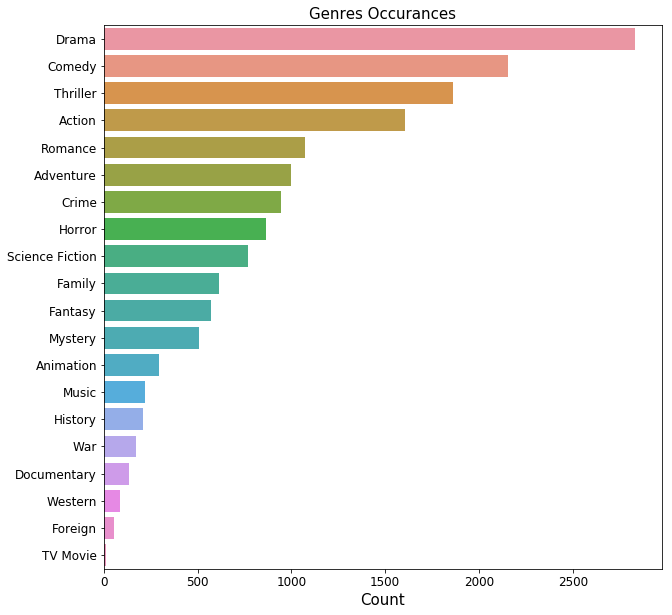

In [22]:
x=df_gen.genres.value_counts().index
y=df_gen.genres.value_counts().values

plt.figure(figsize=(10,10));
sns.barplot(y,x,orient='h');
plt.xlabel('Count',size=15);
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Genres Occurances',size=15);

> In the 20 genres,there are genres that are more frequently occurring than others and we should put that in mind while investigating their popularity. 

> Since the time range of data is lagre, I'm going to divide this period into decades (with incomplete decade at the end) and visualize the total popularity of genres in each one of them.

In [23]:
df_gen.release_year=df_gen.release_year.apply(lambda x: x[:3]+'0') #divide into decades
df_gen_pop=pd.DataFrame(df_gen.groupby(['release_year','genres']\
                                       ,as_index=False).popularity.sum()) #creating data frame grouped by decades and genres
df_gen_pop.tail(25)

,release_year,genres,popularity
91,2000,Science Fiction,267.428377
92,2000,TV Movie,2.532275
93,2000,Thriller,574.114141
94,2000,War,59.802179
95,2000,Western,13.576707
96,2010,Action,811.890600
97,2010,Adventure,643.323797
98,2010,Animation,160.140701
99,2010,Comedy,590.192408
100,2010,Crime,296.418902


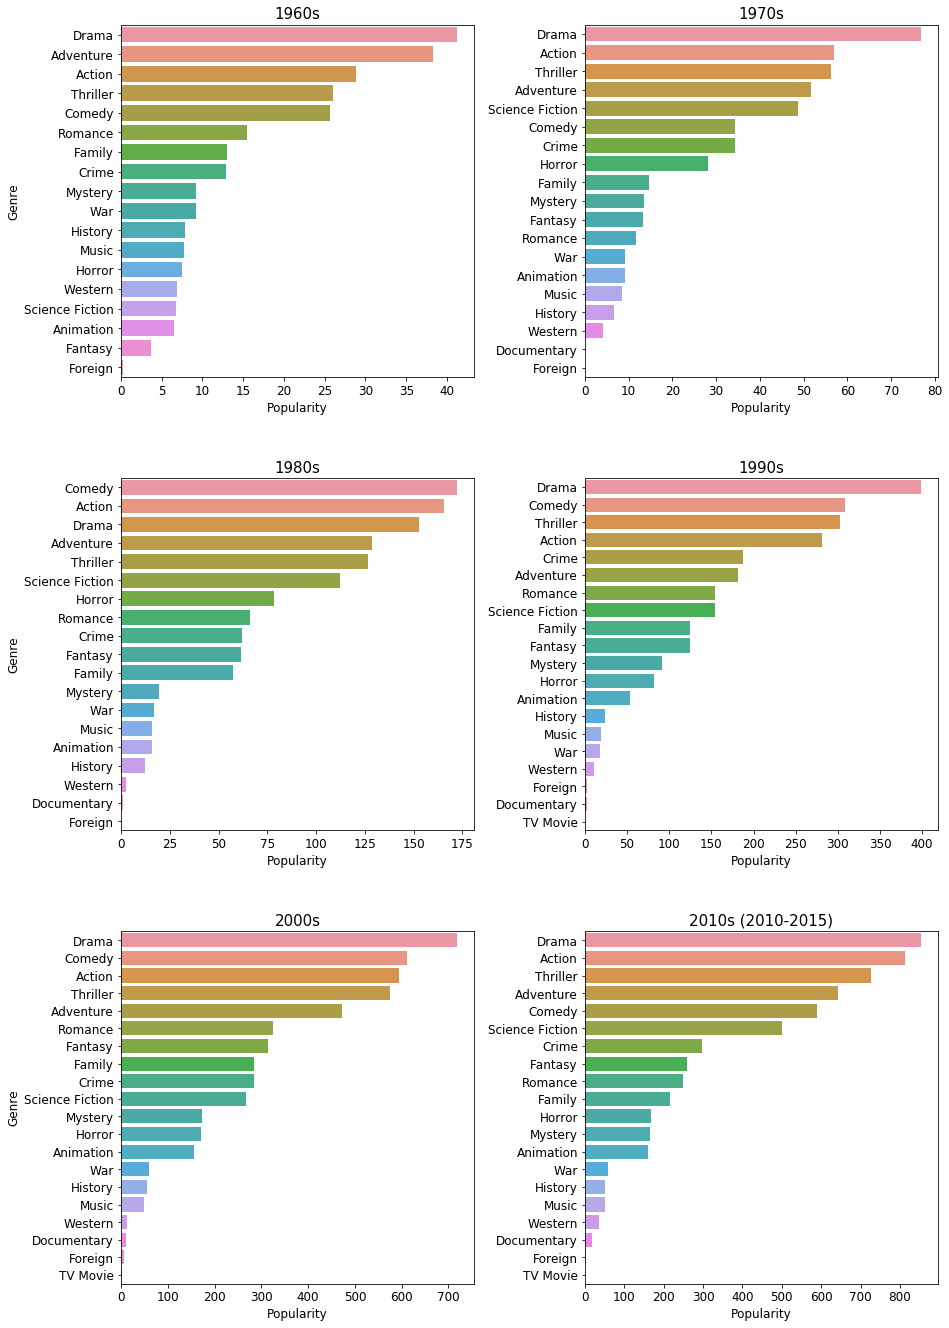

In [24]:
# Plotting Genres Popularities in Every Decade: 
#Used this link to help me in making the subplots: https://bit.ly/3eZMUPD

df_gen1=df_gen_pop.query("release_year== '1960'")
df_gen2=df_gen_pop.query("release_year== '1970'")
df_gen3=df_gen_pop.query("release_year== '1980'")
df_gen4=df_gen_pop.query("release_year== '1990'")
df_gen5=df_gen_pop.query("release_year== '2000'")
df_gen6=df_gen_pop.query("release_year== '2010'")

df_list=[df_gen1, df_gen2, df_gen3, df_gen4, df_gen5, df_gen6]


fig, axes = plt.subplots(3, 2,figsize=(14,20))
fig.tight_layout(pad=8)
count=0
for row in range(3):
    for col in range(2):
        ax=sns.barplot( x='popularity',y='genres',data=df_list[count],orient='h',ax=axes[row,col],\
                       order=df_list[count].sort_values('popularity',ascending=False).genres)
        
        if df_list[count].release_year.unique()[0] != '2010':
            ax.set_title(df_list[count].release_year.unique()[0] + "s",size=15)
        else:
            ax.set_title(df_list[count].release_year.unique()[0] + "s"+ " (2010-2015)",size=15)
            
        if col != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Genre", size=12)
            
        ax.set_xlabel('Popularity',size=12)
        ax.tick_params(labelsize=12)
        count+=1

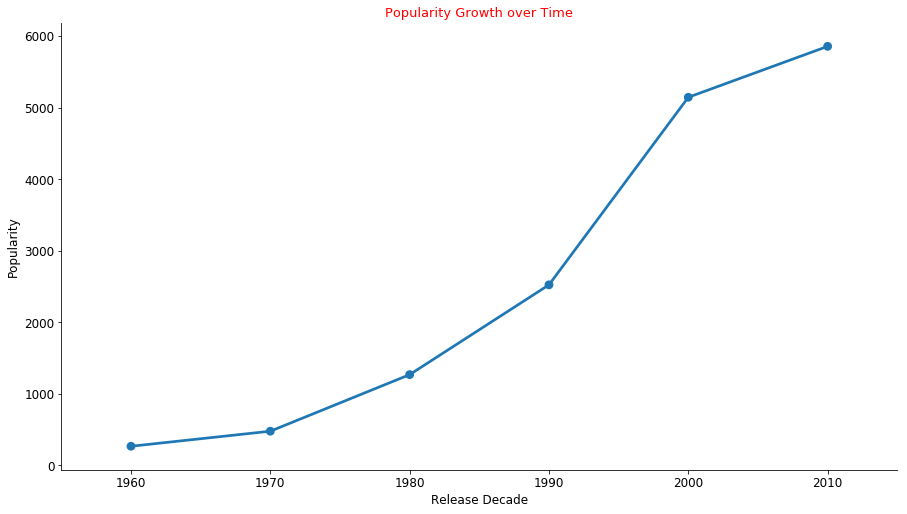

In [25]:
# Plotting Popularity in General over Time:

df_decade_pop=pd.DataFrame(df_gen_pop.groupby('release_year',as_index=False)\
                           .popularity.sum()) #Creating data frame for total popularity each decade


sns.factorplot(x='release_year', y='popularity', data= df_decade_pop,size=7,aspect=1.8);
plt.xlabel('Release Decade',size=12);
plt.ylabel('Popularity',size=12);
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Popularity Growth over Time',size=13,color='r');

> **Popularity is growing** in every decade and the genres that most frequently entered the top 5 in terms of popularity in each decade are:
 * Drama
 * Action
 * Comedy
 * Thriller
 * Adventure (relatively fewer movies are in this genere)

>  Drama is the most popular genre in all decades except in 1980s at which Comedy has peaked before its popularity started to decline relative to other genres.

### Is Higher Rating Means Higher Revenues for the Movie?

First, let's investigate ratings (vote_average).

In [26]:
df.vote_average.min(), df.vote_average.mean(),df.vote_average.max() 

(1.5, 6.0396560116826219, 8.4000000000000004)

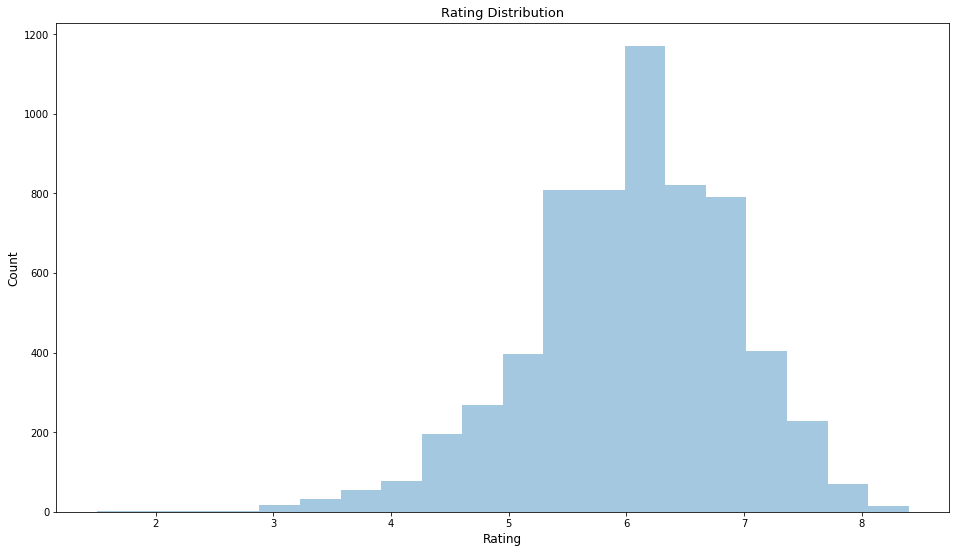

In [27]:
plt.figure(figsize=(16,9))
ax=sns.distplot(df.vote_average,bins=20,kde=False);
ax.set_xlabel('Rating',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Rating Distribution',size=13);

> Ratings distribution is slightly **left-skewed** and ranging between 1.5 and 8.4 with **mean value around 6**.

Now, let's look at revenue distribution.

In [28]:
df.revenue_adj.min(), df.revenue_adj.mean()/1e6,df.revenue_adj.max()/1e6

(0.0, 90.560474462084244, 2827.1237504118899)

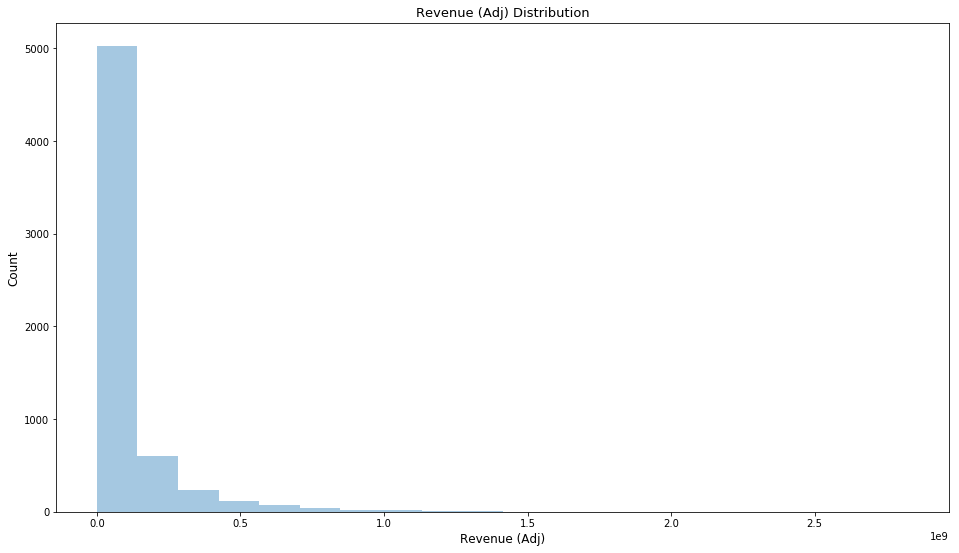

In [29]:
plt.figure(figsize=(16,9))
ax=sns.distplot(df.revenue_adj,bins=20,kde=False);
ax.set_xlabel('Revenue (Adj)',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Revenue (Adj) Distribution',size=13);

In [30]:
round((df.query('revenue_adj > revenue_adj.mean()').revenue_adj.count()\
       /df.revenue_adj.count())*100,0)    #getting percentage of movies that made revenues past the mean

26.0

> Only **26%** of the movies are making revenues past the mean (which is **$91 M**).

Taking that in mind, we are going to see how ratings relate to revenues.

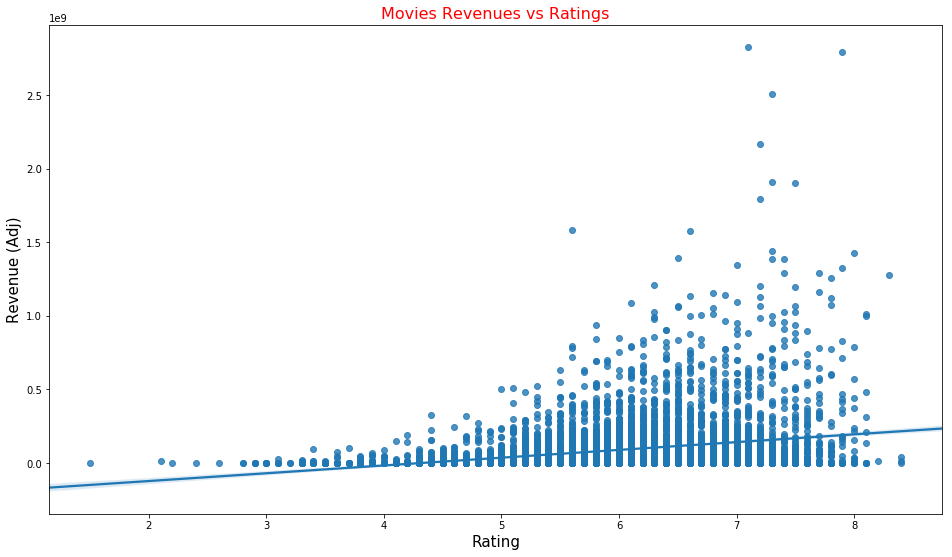

In [31]:
plt.figure(figsize=(16,9))
sns.regplot(data=df,x='vote_average',y='revenue_adj')
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Movies Revenues vs Ratings',size=16,color='r');

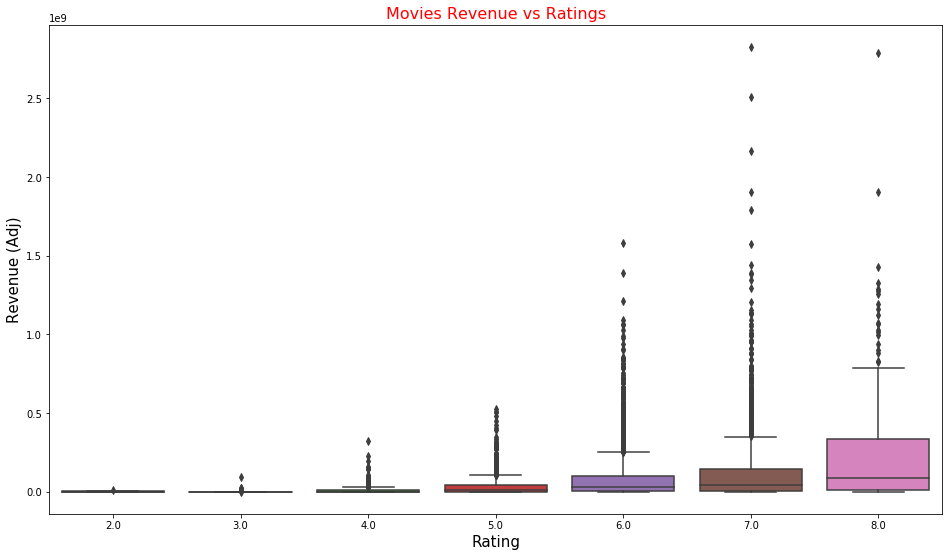

In [32]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df,x=df.vote_average.apply(lambda x: round(x,0))\
            ,y='revenue_adj')      #rounding ratings to nearest number and plot against revenue
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Movies Revenue vs Ratings',size=16,color='r');

> The figures above are showing weak linear relationship between ratings and revenue. There are a lot of outliers at each rating, specially high ratings, and this can be expected since we've found earlier that revenue distribution is extremely skewed to the left which means that movies with high revenues are basically rare in our data.

**Let's see the average of total revenue at each rating.**

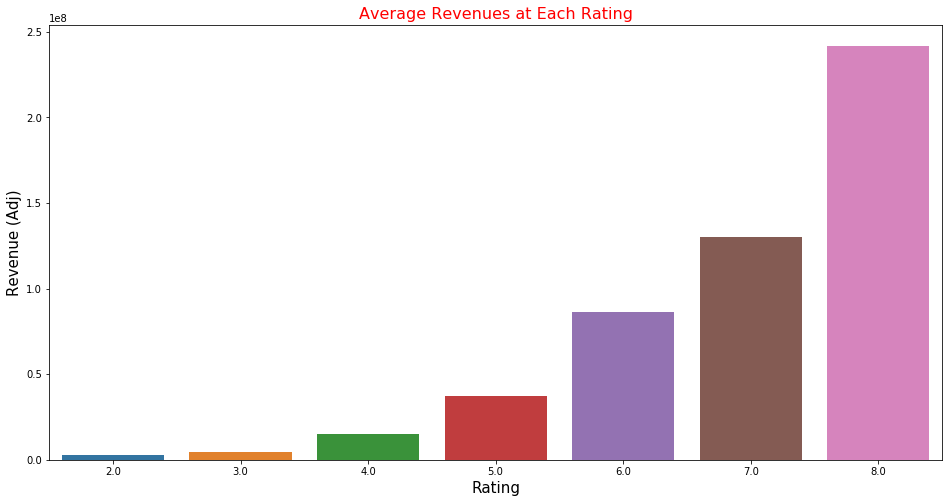

In [33]:
df_vote = df.copy() 
df_vote.vote_average = df.vote_average.apply(lambda x: round(x,0)) 
df_vote_rev = df_vote.groupby('vote_average').revenue_adj.mean() #Ratings rounded to nearest number and average revenue for each

plt.figure(figsize=(16,8))
sns.barplot(df_vote_rev.index,df_vote_rev.values)
plt.xlabel('Rating',size=15)
plt.ylabel('Revenue (Adj)',size=15)
plt.title('Average Revenues at Each Rating',size=16,color='r');

> The biggest revenues are more present at higher ratings.

### How are the Cost of Making a Movie and Total Spending Changed Over Time?

In [34]:
df.budget_adj.min(), df.budget_adj.mean()/1e6,df.budget_adj.max()/1e6

(0.0, 30.939407858777543, 425.0)

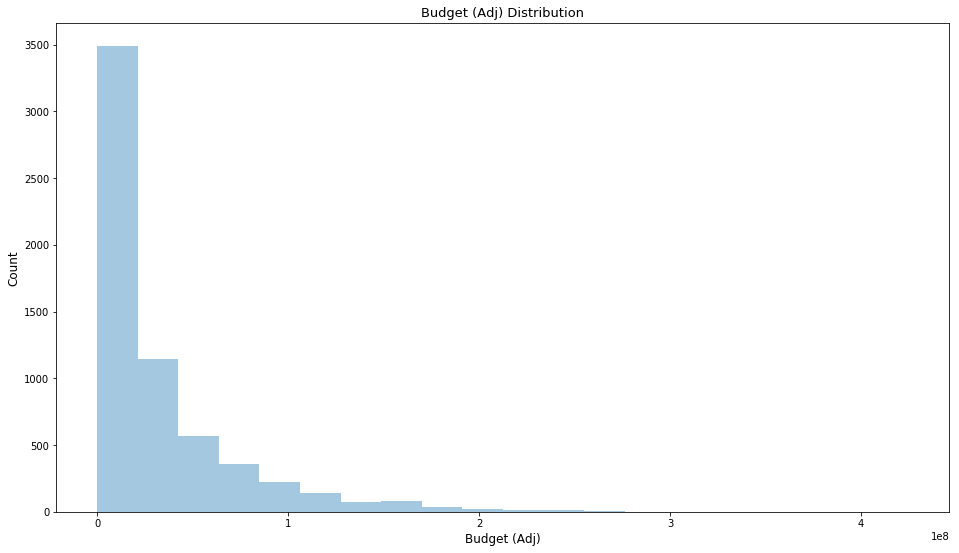

In [35]:
plt.figure(figsize=(16,9))
ax=sns.distplot(df.budget_adj,bins=20,kde=False);
ax.set_xlabel('Budget (Adj)',size=12);
ax.set_ylabel('Count',size=12);
ax.set_title('Budget (Adj) Distribution',size=13);

> Just like revenues, budget distribution is extremely left-skewed meaning that less movies are spending the most.

So, how is spending changed over time?

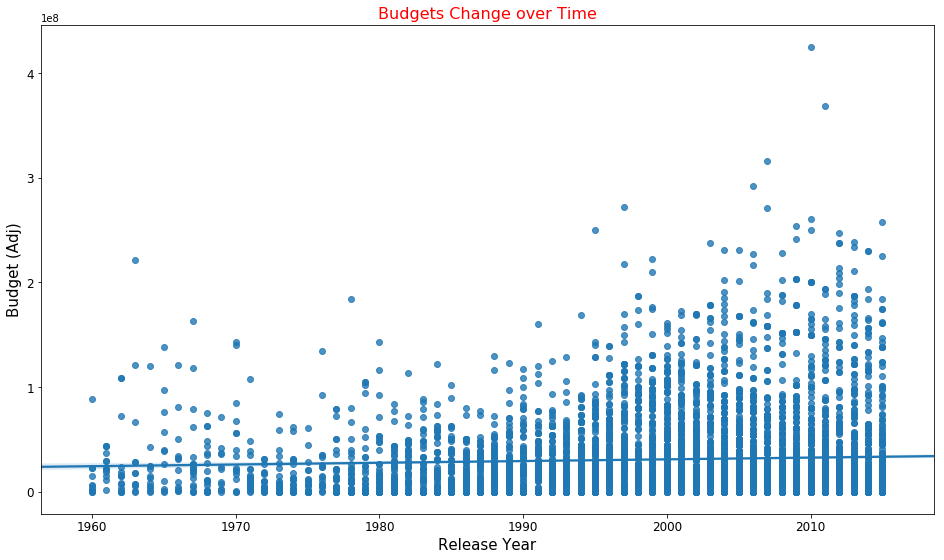

In [36]:
plt.figure(figsize=(16,9))
sns.regplot(data=df,x=df.release_year.astype(int),y='budget_adj');
plt.xlabel('Release Year',size=15)
plt.xticks(size=12)
plt.ylabel('Budget (Adj)',size=15)
plt.yticks(size=12)
plt.title('Budgets Change over Time',size=16,color='r');

> So there is no relation between the amount spent on each movie and time.

Let's see if there is a change in the average spending every year.

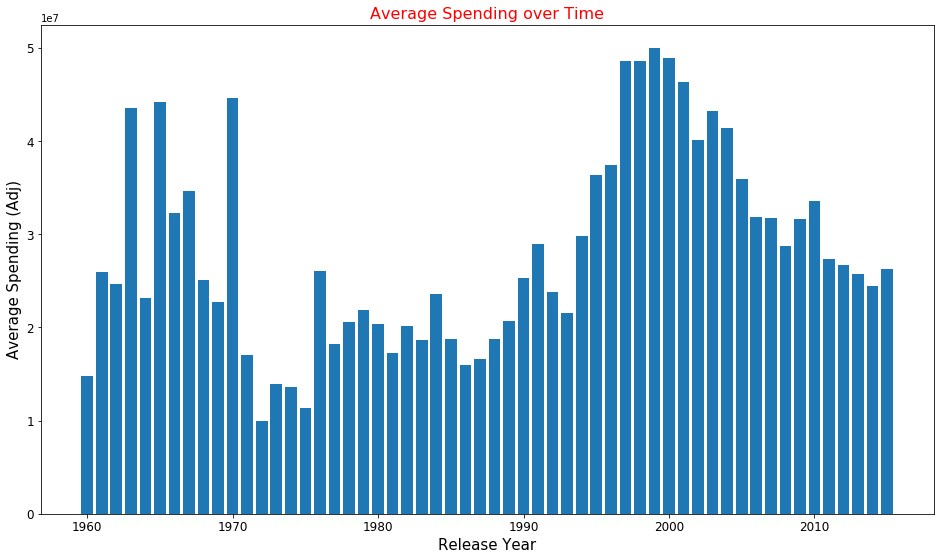

In [37]:
df_bud=df.groupby('release_year').budget_adj.mean()

plt.figure(figsize=(16,9))
plt.bar(x=df_bud.index.astype(int),height=df_bud.values);
plt.xlabel('Release Year',size=15)
plt.xticks(size=12)
plt.ylabel('Average Spending (Adj)',size=15)
plt.yticks(size=12)
plt.title('Average Spending over Time',size=16,color='r');

> The above figure shows ups and downs then a growth in spending starting around 1970s.

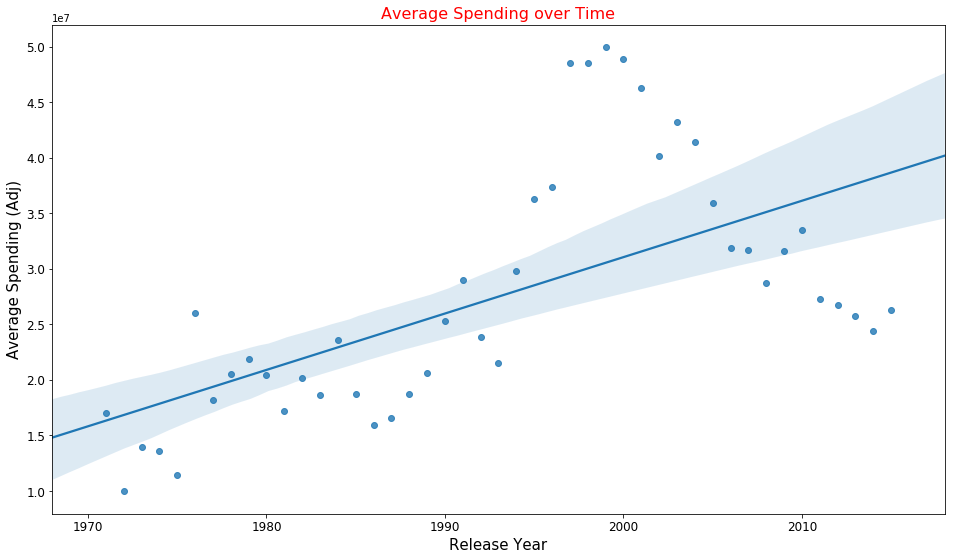

In [38]:
df_bud_sns = pd.DataFrame(df_bud)
df_bud_sns.reset_index(inplace=True)
df_bud_sns.release_year = df_bud_sns.release_year.astype(int) #regression plots has to be between continuous variables so I converted years to integer

plt.figure(figsize=(16,9))
sns.regplot(x='release_year',y='budget_adj',data=df_bud_sns.query("release_year > 1970"))
plt.xlabel('Release Year',size=15)
plt.xticks(size=12)
plt.ylabel('Average Spending (Adj)',size=15)
plt.yticks(size=12)
plt.title('Average Spending over Time',size=16,color='r');

In [39]:
id=df_bud_sns.budget_adj.idxmax() # getting maximum budget value location
df_bud_sns.loc[id].astype(str)

release_year           1999.0
budget_adj      49980115.4092
Name: 39, dtype: object

> From the figures above, spending is **growing** over time and has a peak average of **$50 M** in **1999**.

<a id='conclusions'></a>
## Conclusions

At the end, this analysis is not intended to give any type of causation or statistical conclusion, it is just made to develop a sense of how the data is distributed and the relationships between variables. we can summarize our findings in those few points:
 * **Movies popularity** in general is increasing over time, but as it increases the most **popular genres** are nearly the same every decade with Drama on the top; people tend to prefer Drama, Comedy, Thriller, Adventure, and Action.
 
 * A **movie revenue** has a weak linear relationship with **rating**. However, the average revenues are bigger in the higher ratings.
 
 * **Movies budgets** are not related to time, as there are movies with budgets in every range every year, but the **average spending** in general started to increase linearly over time in the 1970s.